# A1: Data curation
## Dane Jordan

Import necessary libraries that will be used

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

from datetime import datetime

%matplotlib inline

## Step 1: Data acquisition

Below is a function that takes two inputs, the API endpoint (either 'pagecounts' or 'pageviews') and the access parameter. For pagecounts the access parameter can be 'all-sites', 'desktop-site', or 'mobile-site'. For pageviews the access parameter can be 'desktop', 'mobile-app', or 'mobile-web'. The function fills in all other parameters for an API call (thanks Jonathan and Oliver!), and returns the API response.

In [2]:
# since we will be performing api calls at least five times, we will functionalize it
def data_acquisition(api_endpoint, access):

    '''
    call the wikimedia api and return a json format data set
    :param api_endpoint: legacy (pagecounts)
                         current (pageviews)
    :param access: legacy (all-sites, desktop-site, mobile-site)
                   current (desktop, mobile-app, mobile-web)
    '''
    
    # define the parameters for the api call (params listed below are universal across all api calls)
    params = {'project' : 'en.wikipedia.org',
                'agent' : 'user',
                'granularity' : 'monthly',
                'start' : '2008010100',
                'end' : '2017100100'
                }

    # check api_endpoint variable entered is valid for pagecounts
    if api_endpoint == 'pagecounts':
        endpoint = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'
        params['access-site'] = access
        
        # check access variable entered is valid for pagecounts, print error otherwise
        if access != 'all-sites' and access != 'desktop-site' and access != 'mobile-site':
            print('error: invalid access (all-sites, desktop-site, mobile-site)')
        else:
            pass
    
    # check api_endpoint variable entered is valid for pageviews
    elif api_endpoint == 'pageviews':
        endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'
        params['access'] = access
        
        # check access variable entered is valid for pageviews, print error otherwise
        if access != 'desktop' and access != 'mobile-app' and access != 'mobile-web':
            print('error: invalid access (desktop, mobile-app, mobile-web)')
        else:
            pass
    
    # print error message if invalid api_endpoint variable
    else:
        print('error: invalid api_endpoint (pagecounts, pageviews)')
    
#     headers={'User-Agent' : 'https://github.com/drjordy66', 'From' : 'drjordan@uw.edu'}
    
    api_call = requests.get(endpoint.format(**params))
    
    return api_call.json()


Run the above function to call the API and assign the responses to variables

In [3]:
response_pageview_desktop = data_acquisition('pageviews', 'desktop')
response_pageview_mobileweb = data_acquisition('pageviews', 'mobile-web')
response_pageview_mobileapp = data_acquisition('pageviews', 'mobile-app')
response_pagecount_desktop = data_acquisition('pagecounts', 'desktop-site')
response_pagecount_mobile = data_acquisition('pagecounts', 'mobile-site')

Export the API raw data files. This section has been commented out in order to not continuously overwrite the raw data files. The raw data files have already been created and will be imported in the next step.

In [4]:
# json.dump(response_pageview_desktop, open('../data_raw/pageviews_desktop_' + response_pageview_desktop['items'][0]['timestamp'][:-4] + '-' + response_pageview_desktop['items'][-1]['timestamp'][:-4] + '.json', 'w'), indent=4)
# json.dump(response_pageview_mobileweb, open('../data_raw/pageviews_mobile-web_' + response_pageview_mobileweb['items'][0]['timestamp'][:-4] + '-' + response_pageview_mobileweb['items'][-1]['timestamp'][:-4] + '.json', 'w'), indent=4)
# json.dump(response_pageview_mobileapp, open('../data_raw/pageviews_mobile-app_' + response_pageview_mobileapp['items'][0]['timestamp'][:-4] + '-' + response_pageview_mobileapp['items'][-1]['timestamp'][:-4] + '.json', 'w'), indent=4)
# json.dump(response_pagecount_desktop, open('../data_raw/pagecounts_desktop-site_' + response_pagecount_desktop['items'][0]['timestamp'][:-4] + '-' + response_pagecount_desktop['items'][-1]['timestamp'][:-4] + '.json', 'w'), indent=4)
# json.dump(response_pagecount_mobile, open('../data_raw/pagecounts_mobile-site_' + response_pagecount_mobile['items'][0]['timestamp'][:-4] + '-' + response_pagecount_mobile['items'][-1]['timestamp'][:-4] + '.json', 'w'), indent=4)

## Step 2: Data processing

Import the raw .json files to process and create a new file for analysis.

In [5]:
response_pagecount_desktop = json.load(open('../data_raw/pagecounts_desktop-site_200801-201608.json'))
response_pagecount_mobile = json.load(open('../data_raw/pagecounts_mobile-site_201410-201608.json'))
response_pageview_desktop = json.load(open('../data_raw/pageviews_desktop_201507-201709.json'))
response_pageview_mobileapp = json.load(open('../data_raw/pageviews_mobile-app_201507-201709.json'))
response_pageview_mobileweb = json.load(open('../data_raw/pageviews_mobile-web_201507-201709.json'))

### Functions for processing

`get_views` and `get_counts` take the raw .json files as inputs, strip the timestamps and views/counts, and return arrays with two columns (timestamp, views/counts) and a row with each month's worth of data.

`lookup_val` takes the arrays created from the prior functions as one input and a date as a second input. It uses the date to find the index within the array from column 1 (timestamp) and returns the value from that same index in column 2 (counts/views). If the date is not within the array, then a value of 0 is assigned.

In [6]:
def get_views(api_response):
    
    '''
    strip all views from an api response
    '''
    
    temp_list = []
    for i in api_response['items']:
            temp_list.append([i['timestamp'], i['views']])
    
    return np.array(temp_list)

def get_count(api_response):
    
    '''
    strip all views from an api response
    '''
    
    temp_list = []
    for i in api_response['items']:
            temp_list.append([i['timestamp'], i['count']])
    
    return np.array(temp_list)

def lookup_val(api_views, date):
    
    '''
    find row index against all dates and create views respective column
    '''
    
    if i in list(api_views[:,0]):
        row_idx = list(api_views[:,0]).index(date)
        row_val = int(api_views[:,1][row_idx])
    else:
        row_val = 0
        
    return row_val


Run the above functions to get all of the views/counts for both the legacy and current API

In [7]:
# strip all dates and views/count from api responses
pageview_desktop_views = get_views(response_pageview_desktop)
pageview_mobileweb_views = get_views(response_pageview_mobileweb)
pageview_mobileapp_views = get_views(response_pageview_mobileapp)
pagecount_desktop_views = get_count(response_pagecount_desktop)
pagecount_mobile_views = get_count(response_pagecount_mobile)


### Processing

First, all of the formatted arrays from the API responses are concatenated and the first column (timestamp) is taken as a `set()` to remove any duplicate timestamps. From here we can easily parse the timestamps into a list of just the years and a list of just the months. This gives us our first two columns of our cleaned data, 'year' and 'month'.

In [8]:
# combine all data into one array
all_dates_views = np.concatenate((pageview_desktop_views,
                                  pageview_mobileweb_views,
                                  pageview_mobileapp_views,
                                  pagecount_desktop_views,
                                  pagecount_mobile_views))

# strip only dates, remove duplicates, sort
all_dates = sorted(list(set(all_dates_views[:, 0])))

# parse into years and months
year_col = [all_dates[i][:-6] for i in range(len(all_dates))]
month_col = [all_dates[i][4:6] for i in range(len(all_dates))]


Second, we initialize five (one for each API response) lists where we will obtain just the counts/views from the two column arrays. We will then loop through all of the dates (no duplicates) that we found from the previous step and use the `lookup_val` function to find the corresponding counts/views for each API response and append these to lists we initialized.

In [9]:
# initialize lists for columns of csv file
pageview_desktop_views_col = []
pageview_mobileweb_views_col = []
pageview_mobileapp_views_col = []
pagecount_desktop_views_col = []
pagecount_mobile_views_col = []

# loop through all of the dates and lookup respective values from each api response
for i in all_dates:
    pageview_desktop_views_col.append(lookup_val(pageview_desktop_views, i))
    pageview_mobileweb_views_col.append(lookup_val(pageview_mobileweb_views, i))
    pageview_mobileapp_views_col.append(lookup_val(pageview_mobileapp_views, i))
    pagecount_desktop_views_col.append(lookup_val(pagecount_desktop_views, i))
    pagecount_mobile_views_col.append(lookup_val(pagecount_mobile_views, i))


Third, we need to aggregate the two mobile sets of data from pageviews to get the total mobile data. For both pagecounts and pageviews we aggregate the desktop counts/views and mobile counts/views to get the total views for each.

In [10]:
# aggregate the mobile views from pageviews and the "all views" from pageviews and pagecounts
pageview_mobile_views_col = [sum(i) for i in zip(pageview_mobileweb_views_col, pageview_mobileapp_views_col)]
pageview_all_views_col = [sum(i) for i in zip(pageview_desktop_views_col, pageview_mobile_views_col)]
pagecount_all_views_col = [sum(i) for i in zip(pagecount_desktop_views_col, pagecount_mobile_views_col)]


Convert to pandas DataFrame for easy export.

In [11]:
# assign column data to a pandas dataframe
df = pd.DataFrame({'year': year_col,
                   'month': month_col,
                   'pagecount_all_views': pagecount_all_views_col,
                   'pagecount_desktop_views': pagecount_desktop_views_col,
                   'pagecount_mobile_views': pagecount_mobile_views_col,
                   'pageview_all_views': pageview_all_views_col,
                   'pageview_desktop_views': pageview_desktop_views_col,
                   'pageview_mobile_views': pageview_mobile_views_col})

# organize in correct column order
df = df[['year',
         'month',
         'pagecount_all_views',
         'pagecount_desktop_views',
         'pagecount_mobile_views',
         'pageview_all_views',
         'pageview_desktop_views',
         'pageview_mobile_views']]


Export data in single csv. This section has been commented out in order to not continuously overwrite the cleaned data file. The cleaned data file has already been created and will be imported in the next step.

In [12]:
# write the column data to csv
# df.to_csv('../data_clean/en-wikipedia_traffic_200801-201709.csv', index=False)


## Step 3: Analysis

Import the cleaned data file to use for analysis.

In [13]:
df = pd.read_csv('../data_clean/en-wikipedia_traffic_200801-201709.csv',
                 dtype={'year': str, 'month': str})

### Plot the data

The dates from the csv are converted to a datetime format in order to be plotted neatly. The points from the data are plotted, filtering out non-zero values in y-axis data.

The figure is then saved as a .png file.

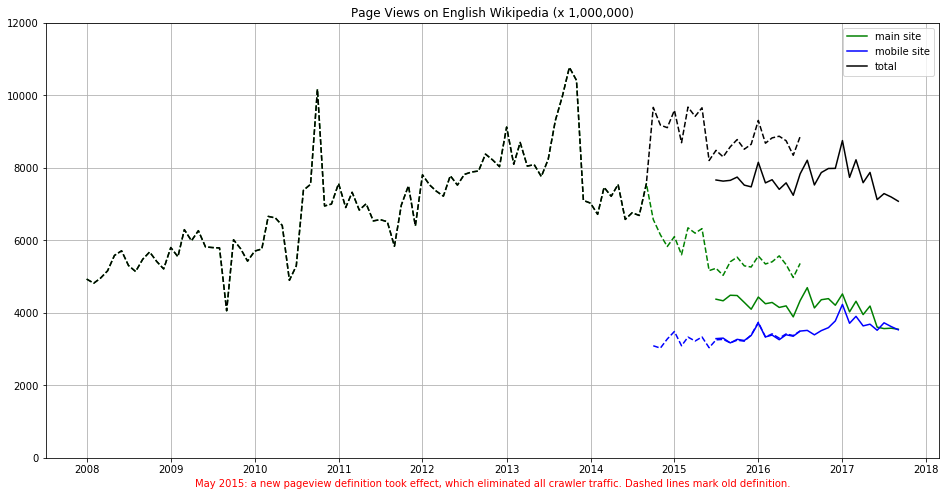

In [14]:
# convert dates to a datetime format for plotting
dates = np.array([datetime.strptime(list(df['year'])[i] + list(df['month'])[i], '%Y%m') for i in range(len(df))])

# set plot size
plt.figure(figsize=(16, 8))

# plot the points, filtering on non-zero values in the column data
plt.plot(dates[np.array(df['pageview_desktop_views']) > 0],
         np.array(df['pageview_desktop_views'])[np.array(df['pageview_desktop_views']) > 0], 'g')
plt.plot(dates[np.array(df['pageview_mobile_views']) > 0],
         np.array(df['pageview_mobile_views'])[np.array(df['pageview_mobile_views']) > 0], 'b')
plt.plot(dates[np.array(df['pageview_all_views']) > 0],
         np.array(df['pageview_all_views'])[np.array(df['pageview_all_views']) > 0], 'k')
plt.plot(dates[np.array(df['pagecount_desktop_views']) > 0][:-1],
         np.array(df['pagecount_desktop_views'])[np.array(df['pagecount_desktop_views']) > 0][:-1], 'g--')
plt.plot(dates[np.array(df['pagecount_mobile_views']) > 0][:-1],
         np.array(df['pagecount_mobile_views'])[np.array(df['pagecount_mobile_views']) > 0][:-1], 'b--')
plt.plot(dates[np.array(df['pagecount_all_views']) > 0][:-1],
         np.array(df['pagecount_all_views'])[np.array(df['pagecount_all_views']) > 0][:-1], 'k--')

# add gridlines, x-axis label, scale (to match assignment), title, legend
plt.grid(True)
plt.xlabel('May 2015: a new pageview definition took effect, which eliminated all crawler traffic. Dashed lines mark old definition.', color='r')
plt.ylim(0, 12e9)
plt.yticks([0, 2e9, 4e9, 6e9, 8e9, 10e9, 12e9], [0, 2000, 4000, 6000, 8000, 10000, 12000])
plt.title('Page Views on English Wikipedia (x 1,000,000)')
plt.legend(['main site', 'mobile site', 'total'])

# save an image of the analysis
plt.savefig('../analysis/analysis.png')